# Proyecto Optimizacion
### Integrantes: Santiago Lopez, Juan Jose Castrillon, Samuel Lopera

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import random

In [2]:
# Definicion del tipo de dato grafo que vamos a utilizar
class Graph:
    def __init__(self):
        self.graph = {}

    def add_vertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = []
    
    def add_edge(self, vertex1, vertex2, weight):
        self.add_vertex(vertex1)
        self.add_vertex(vertex2)
        self.graph[vertex1].append((vertex2,weight))
        self.graph[vertex2].append((vertex1,weight))

    def get_neighbours(self,vertex):
        if vertex in self.graph:
            return self.graph[vertex]
        else:
            return None
    def get_vertices(self):
        return list(self.graph.keys())
    
    def get_weight(self):
        total_weight = 0
        for vertex in self.graph:
            for edge in self.graph[vertex]:
                total_weight += edge[1]
        return total_weight/2
    
    def __str__(self):
        return str(self.graph)
        

In [3]:
def visualize_graph(graph,title = "Grafo"):
    # get the number of vertices in the graph
    num_vertices = len(graph.graph)

    # generate a dictionary of positions for the vertices
    positions = {vertex: (np.cos(2 * np.pi * i / num_vertices), np.sin(2 * np.pi * i / num_vertices))
                 for i, vertex in enumerate(graph.graph)}

    # create a figure and axis object
    fig, ax = plt.subplots()

    # plot the edges and their weights
    for vertex in graph.graph:
        for neighbor, weight in graph.get_neighbours(vertex):
            x1, y1 = positions[vertex]
            x2, y2 = positions[neighbor]
            dx, dy = x2 - x1, y2 - y1
            ax.arrow(x1, y1, dx, dy, length_includes_head=True)
            ax.text(x1 + dx / 2, y1 + dy / 2, str(weight),
                    ha='left', va='top')

    # plot the vertices
    for vertex, position in positions.items():
        ax.text(position[0], position[1], vertex, ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))

    # set the axis limits and labels
    ax.set_title(title)

    # show the plot
    plt.show()

In [4]:
# Definicion Grafo 1
grafo1 = Graph()
grafo1.add_edge('A1', 'A2', 6)
grafo1.add_edge('A1', 'A4', 4)
grafo1.add_edge('A1', 'A7', 3)
grafo1.add_edge('A2', 'A4', 4)
grafo1.add_edge('A2', 'A3', 3)
grafo1.add_edge('A3', 'A4', 4)
grafo1.add_edge('A3', 'A5', 3.5)
grafo1.add_edge('A4', 'A5', 3)
grafo1.add_edge('A4', 'A6', 3.5)
grafo1.add_edge('A4', 'A7', 6)
grafo1.add_edge('A4', 'A8', 3.5)
grafo1.add_edge('A5', 'A6', 3.5)
grafo1.add_edge('A6', 'A8', 3.5)
grafo1.add_edge('A6', 'A9', 3.5)
grafo1.add_edge('A7', 'A8', 1.5)
grafo1.add_edge('A7', 'A10', 3)
grafo1.add_edge('A8', 'A9', 3)
grafo1.add_edge('A8', 'A10', 3)
grafo1.add_edge('A8', 'A11', 5)
grafo1.add_edge('A9', 'A11', 3.5)
grafo1.add_edge('A10', 'A11', 4.5)

print(grafo1.get_neighbours('A1'))


[('A2', 6), ('A4', 4), ('A7', 3)]


In [5]:
# Mi implementacion
#visualize_graph(grafo1,"Grafo 1")
def get_MST(graph):
    MST_graph = Graph()
    MST = []
    to_visit = []
    visited = []
    vertices = graph.get_vertices()
    num_vertices = len(vertices)
    # Selecting a random starting vertex 
    initial_num = random.randint(0,num_vertices-1)
    initial_vertex = vertices[initial_num]
    
    # Creating the minimum spanning tree graph, and addind the starting vertex
    MST_graph.add_vertex(initial_vertex)
    MST.append(initial_vertex)
    visited.append(initial_vertex)

    current = initial_vertex

    while len(MST_graph.get_vertices()) != num_vertices:
        # Getting available vertices to get to
        neighbours = graph.get_neighbours(current)
        for i in neighbours:
            if i[0] not in MST_graph.get_vertices():
                # Adding vertices that dont have a path yet from the current
                # vertex to a list, to visit them later
                to_visit.append((current,i))
        min = sys.maxsize
        item = None

        for i in to_visit:
            if i[1][0] in visited and i != None:
                to_visit.remove(i)
            elif i[1][1] <= min:
                min = i[1][1]
                item = i
                current = i[0]
                next_vertex = i[1][0]
        if item == None:
            break
        else:
            to_visit.remove(item)
            MST_graph.add_edge(current, next_vertex,min)
            current = next_vertex
            visited.append(current)

    return MST_graph

MST = get_MST(grafo1)
print(MST.get_weight())


30.5


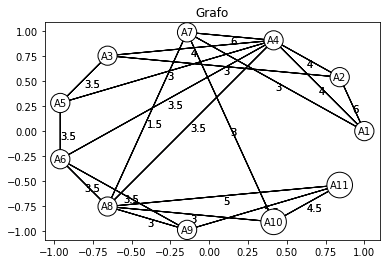

In [6]:
visualize_graph(grafo1)

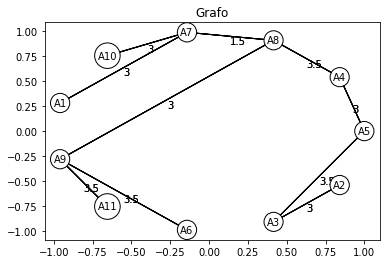

In [7]:
visualize_graph(MST)

In [8]:
# Definicion Grafo 2
# Falta definir, solo se definio bien A1
grafo2 = Graph()
grafo2.add_edge('A1','A2',1)
grafo2.add_edge('A1','A4',1.75)
grafo2.add_edge('A1','A16',2.5)
grafo2.add_edge('A1','A24',1.5)
grafo2.add_edge('A1','A25',3)
grafo2.add_edge('A1','A26',2.5)
grafo2.add_edge('A2','A3',3.5)
grafo2.add_edge('A2','A4',2)
grafo2.add_edge('A3','A4',2)
grafo2.add_edge('A3','A5',1)
grafo2.add_edge('A3','A7',2)
grafo2.add_edge('A4','A5',1.75)
grafo2.add_edge('A4','A16',2)
grafo2.add_edge('A4','A24',2.5)
grafo2.add_edge('A5','A7',1.75)
grafo2.add_edge('A5','A6',0.5)
grafo2.add_edge('A5','A16',2.5)
grafo2.add_edge('A6','A7',1.5)
grafo2.add_edge('A6','A13',1.75)
grafo2.add_edge('A6','A15',3.5) # Revisar
grafo2.add_edge('A6','A16',2.5)
grafo2.add_edge('A7','A8',2)
grafo2.add_edge('A7','A9',2.25)
grafo2.add_edge('A7','A13',2)
grafo2.add_edge('A8','A9',1.5)
grafo2.add_edge('A8','A13',3)
grafo2.add_edge('A9','A10',2.25)
grafo2.add_edge('A9','A13',2.5)
grafo2.add_edge('A10','A11',1.25)
grafo2.add_edge('A10','A12',2.5)
grafo2.add_edge('A10','A13',3)
grafo2.add_edge('A11','A12',2)
grafo2.add_edge('A11','A20',3.5)
grafo2.add_edge('A12','A13',3)
grafo2.add_edge('A12','A14',2.5)
grafo2.add_edge('A12','A15',3)
grafo2.add_edge('A12','A20',2)
grafo2.add_edge('A13','A15',2.5)
grafo2.add_edge('A13','A16',3) #Revisar
grafo2.add_edge('A14','A15',2)
grafo2.add_edge('A14','A17',2.25)
grafo2.add_edge('A14','A19',3.25)
grafo2.add_edge('A14','A20',2)
grafo2.add_edge('A15','A16',1.75)
grafo2.add_edge('A15','A17',3)
grafo2.add_edge('A15','A18',3)
grafo2.add_edge('A15','A19',3)
grafo2.add_edge('A15','A24',3.5)
grafo2.add_edge('A16','A19',2.25)
grafo2.add_edge('A16','A24',2)
grafo2.add_edge('A17','A18',0.75)
grafo2.add_edge('A17','A21',1)
grafo2.add_edge('A18','A19',1.25)
grafo2.add_edge('A18','A21',1.5)
grafo2.add_edge('A18','A22',2.5)
grafo2.add_edge('A18','A23',2.25)
grafo2.add_edge('A19','A22',2.25)
grafo2.add_edge('A19','A23',2.5)
grafo2.add_edge('A19','A24',2)
grafo2.add_edge('A19','A25',3.25)
grafo2.add_edge('A20','A21',4.25)
grafo2.add_edge('A21','A22',3)
grafo2.add_edge('A22','A23',1.25)
grafo2.add_edge('A23','A24',3.25)
grafo2.add_edge('A23','A25',2)
grafo2.add_edge('A24','A25',2.5)
grafo2.add_edge('A24','A26',3)
grafo2.add_edge('A25','A26',1.5)

# visualize_graph(grafo2)
MST2 = get_MST(grafo2)
print(MST2.get_weight())

39.75


In [9]:
print(MST2)

{'A21': [('A17', 1)], 'A17': [('A21', 1), ('A18', 0.75)], 'A18': [('A17', 0.75), ('A19', 1.25)], 'A19': [('A18', 1.25), ('A24', 2), ('A22', 2.25)], 'A24': [('A19', 2), ('A1', 1.5)], 'A1': [('A24', 1.5), ('A2', 1), ('A4', 1.75), ('A26', 2.5)], 'A2': [('A1', 1)], 'A4': [('A1', 1.75), ('A5', 1.75), ('A16', 2)], 'A5': [('A4', 1.75), ('A6', 0.5), ('A3', 1)], 'A6': [('A5', 0.5), ('A7', 1.5), ('A13', 1.75)], 'A3': [('A5', 1)], 'A7': [('A6', 1.5), ('A8', 2)], 'A13': [('A6', 1.75)], 'A8': [('A7', 2), ('A9', 1.5)], 'A9': [('A8', 1.5)], 'A16': [('A4', 2), ('A15', 1.75)], 'A15': [('A16', 1.75), ('A14', 2)], 'A14': [('A15', 2), ('A20', 2)], 'A20': [('A14', 2), ('A12', 2)], 'A12': [('A20', 2), ('A11', 2)], 'A11': [('A12', 2), ('A10', 1.25)], 'A10': [('A11', 1.25)], 'A22': [('A19', 2.25), ('A23', 1.25)], 'A23': [('A22', 1.25)], 'A26': [('A1', 2.5), ('A25', 1.5)], 'A25': [('A26', 1.5)]}


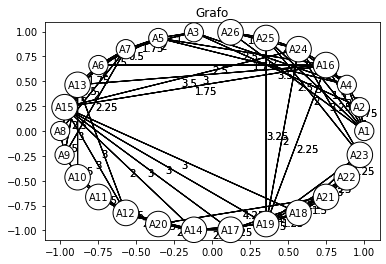

In [10]:
visualize_graph(grafo2)

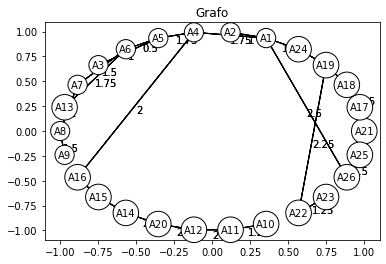

In [11]:
visualize_graph(MST2)